# Transfer Learning with Keras 

- Let's look at theold model
- Modify the previous model to train it on new data. 

# The Old Model: MNist Dataset

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()



x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

Using TensorFlow backend.


x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


## plots

In [3]:
import matplotlib.pyplot as plt
import numpy as np

img = np.squeeze(x_train[0,...])

plt.figure()
plt.imshow(img)
plt.show()


<Figure size 640x480 with 1 Axes>

### imports

In [4]:
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.losses import *
from keras.metrics import *


### create model

In [8]:


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


In [10]:
batch_size = 128

num_classes = 10

epochs = 12

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 106s 2ms/step - loss: 0.2369 - accuracy: 0.9273 - val_loss: 0.0506 - val_accuracy: 0.9834
Epoch 2/12
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0813 - accuracy: 0.9756 - val_loss: 0.0386 - val_accuracy: 0.9875
Epoch 3/12
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0621 - accuracy: 0.9816 - val_loss: 0.0363 - val_accuracy: 0.9887
Epoch 4/12
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0527 - accuracy: 0.9831 - val_loss: 0.0312 - val_accuracy: 0.9897
Epoch 5/12
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0447 - accuracy: 0.9864 - val_loss: 0.0291 - val_accuracy: 0.9910
Epoch 6/12
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.0306 - val_accuracy: 0.9903
Epoch 7/12
60000/60000 [==============================] - 114s

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026119634902073335
Test accuracy: 0.9922000169754028


# Transfer Learning 

<img src = "https://cdn-images-1.medium.com/freeze/max/1000/1*ZJmOqK41yURkbJpCvbLPhg.png?q=20" height = "100">



Our model has 8 layers. Let's freeze the first 6 layers to then feature extract on the last 2 layers. 


In [12]:
for layer in model.layers[:6]:
    layer.trainable = False
    
for layer in model.layers[6:]:
    layer.trainable=True
    
    

In [13]:
# Let's load and format pur new dataset: the MNIST Fashion Data set

In [14]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


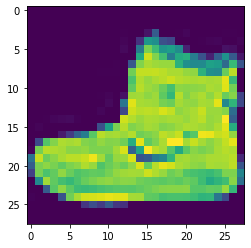

In [15]:
img = np.squeeze(x_train[0,...])

plt.figure()
plt.imshow(img)
plt.show()


In [16]:
batch_size = 128



Let's look at the model architecture

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

C:\Users\coder\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [18]:
fine_tune_epochs = 10;
total_epochs = epochs + fine_tune_epochs

history_fine = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=total_epochs, initial_epoch = 12,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 13/22
60000/60000 [==============================] - 107s 2ms/step - loss: 0.5322 - accuracy: 0.8195 - val_loss: 0.3301 - val_accuracy: 0.8816
Epoch 14/22
60000/60000 [==============================] - 104s 2ms/step - loss: 0.3316 - accuracy: 0.8791 - val_loss: 0.2948 - val_accuracy: 0.8957
Epoch 15/22
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2938 - accuracy: 0.8940 - val_loss: 0.2675 - val_accuracy: 0.9022
Epoch 16/22
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2668 - accuracy: 0.9025 - val_loss: 0.2578 - val_accuracy: 0.9050
Epoch 17/22
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2467 - accuracy: 0.9090 - val_loss: 0.2401 - val_accuracy: 0.9120
Epoch 18/22
60000/60000 [==============================] - 106s 2ms/step - loss: 0.2308 - accuracy: 0.9158 - val_loss: 0.2476 - val_accuracy: 0.9100
Epoch 19/22
60000/60000 [==============================]

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22467337379455565
Test accuracy: 0.9244999885559082


## Your Turn: Change the number of layers that we freeze

In [20]:
# Insert Code Here

for layer in model.layers[:4]:
    layer.trainable = False
    
for layer in model.layers[4:]:
    layer.trainable=True
    

## Train the model

In [21]:
# Insert Code Here
fine_tune_epochs = 10;
total_epochs = epochs + fine_tune_epochs

history_fine = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=total_epochs, initial_epoch = 12,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 13/22
60000/60000 [==============================] - 104s 2ms/step - loss: 0.1740 - accuracy: 0.9347 - val_loss: 0.2260 - val_accuracy: 0.9203
Epoch 14/22
60000/60000 [==============================] - 107s 2ms/step - loss: 0.1638 - accuracy: 0.9387 - val_loss: 0.2286 - val_accuracy: 0.9235
Epoch 15/22
60000/60000 [==============================] - 108s 2ms/step - loss: 0.1533 - accuracy: 0.9427 - val_loss: 0.2287 - val_accuracy: 0.9250
Epoch 16/22
60000/60000 [==============================] - 109s 2ms/step - loss: 0.1466 - accuracy: 0.9451 - val_loss: 0.2312 - val_accuracy: 0.9231
Epoch 17/22
60000/60000 [==============================] - 108s 2ms/step - loss: 0.1410 - accuracy: 0.9455 - val_loss: 0.2323 - val_accuracy: 0.9230
Epoch 18/22
60000/60000 [==============================] - 106s 2ms/step - loss: 0.1369 - accuracy: 0.9484 - val_loss: 0.2343 - val_accuracy: 0.9264
Epoch 19/22
60000/60000 [==============================]

## Evaluate Accuracy

In [22]:
# Insert Code Here
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2351897906422615
Test accuracy: 0.9279000163078308
